In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/muchmoredata/MuchMoreData.csv


Ce dataset se compose d’abstracts de publications scientifiques médicales, qui traitent de différents domaines: Cardiologie, Ophtalmologie etc. On a donc un problème de classification multiclasses (assigne une seule des classes possibles à un document). La catégorie à laquelle appartient un document correspond à la première partie de son nom.

A partir de ce dataset, nous allo

*    

Proposer une analyse exploratoire des éon
*    ées
Présenter et commenter quelques visualisations et métriques pertine*    ntes
Comparer les performances de deux approches pour la classification des doc :  
1.   SVM l vs e
2.   Naiv*    e Bayes
Proposer une exploration interactive des données et résultats

In [2]:
!pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=fae79651a0fc70566fad236579fec0e774d41d211f5b71f3b0b4d0cbdbaa6cef
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


In [3]:
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import Counter
#from plotly import tools
#import plotly.offline as py
#py.init_notebook_mode(connected=True)
#import plotly.graph_objs as go

#from pandarallel import pandarallel
#pandarallel.initialize(progress_bar=True)

import swifter
from sklearn.decomposition import PCA

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Analyse exploratoire des données

## Nombre total de documents

In [4]:
df = pd.read_csv("/kaggle/input/muchmoredata/MuchMoreData.csv")
df.shape[0]

7823

## Répartition des classes (nombre de documents par catégorie).

In [5]:
df['clean_category'] = df['category'].swifter.apply(lambda x: x.split('.')[0])
print(df.shape)
df.head()

Pandas Apply:   0%|          | 0/7823 [00:00<?, ?it/s]

(7823, 4)


Unnamed: 0                         category  \
0           0  Arthroskopie.00130003.eng.abstr   
1           1  Arthroskopie.00130011.eng.abstr   
2           2  Arthroskopie.00130017.eng.abstr   
3           3  Arthroskopie.00130030.eng.abstr   
4           4  Arthroskopie.00130035.eng.abstr   

                                             content clean_category  
0  The posterior cruciate ligament (PCL) is the s...   Arthroskopie  
1  An investigation of 122 knee joints was perfor...   Arthroskopie  
2  This article discusses the surgical treatment ...   Arthroskopie  
3  The treatment of acute posterior instabilities...   Arthroskopie  
4  Since 1989, 99 people presenting with posterio...   Arthroskopie

In [6]:
print(len(df['clean_category'].value_counts()))
df['clean_category'].value_counts()

39


clean_category
DerHautarzt                        693
DerChirurg                         684
DerAnaesthesist                    539
DerNervenarzt                      493
DerRadiologe                       477
ZfuerKardiologie                   434
DerUnfallchirurg                   403
DerOpthalmologe                    399
DerOrthopaede                      356
MonatsschriftKinderheilkunde       355
HNO                                312
DerPathologe                       294
IntensiveMedizin                   242
MundKieferGesichtschirurgie        231
DerUrologeA                        224
ZfuerRheumatologie                 153
DerSchmerz                         140
ZfuerGerontologie+Geriatrie        137
DerGynaekologe                     133
Psychotherapeut                    122
Gefaesschirurgie                   106
Rechtsmedizin                      101
Arthroskopie                        95
ZfuerHerzThoraxGefaesschirurgie     93
Herzschrittmachertherapie           77
Bundesgesu

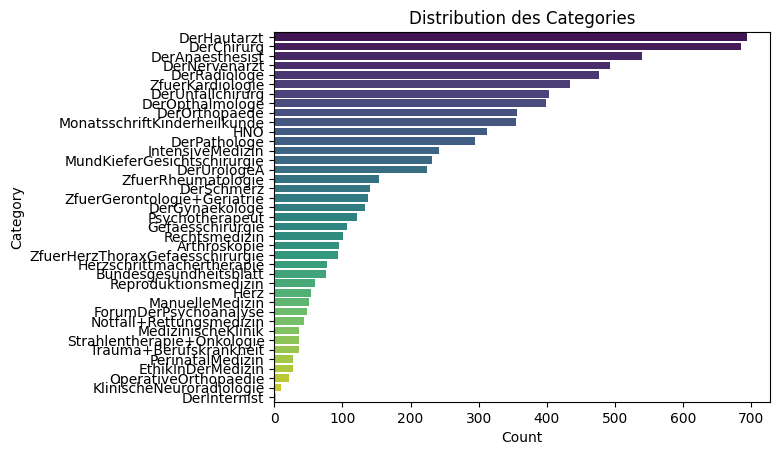

In [7]:
#import matplotlib.pyplot as plt

#df['clean_category'].value_counts().plot(kind='barh')
#plt.ylabel('Count')
#plt.xlabel('Category')
#_ = plt.title('Distribution des Categories')
import seaborn as sns
import matplotlib.pyplot as plt

# Trier les catégories par fréquence pour un affichage propre
category_counts = df['clean_category'].value_counts()

# Créer une palette de couleurs avec Seaborn
palette = sns.color_palette('viridis', len(category_counts))

# Tracer le graphique
sns.barplot(
    x=category_counts.values, 
    y=category_counts.index, 
    palette=palette
)
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Distribution des Categories')
plt.show()

## Distribution des langues

In [8]:
df['lang'] = df['category'].swifter.apply(lambda x: x.split('.')[2])
df.head()

Pandas Apply:   0%|          | 0/7823 [00:00<?, ?it/s]

Unnamed: 0                         category  \
0           0  Arthroskopie.00130003.eng.abstr   
1           1  Arthroskopie.00130011.eng.abstr   
2           2  Arthroskopie.00130017.eng.abstr   
3           3  Arthroskopie.00130030.eng.abstr   
4           4  Arthroskopie.00130035.eng.abstr   

                                             content clean_category lang  
0  The posterior cruciate ligament (PCL) is the s...   Arthroskopie  eng  
1  An investigation of 122 knee joints was perfor...   Arthroskopie  eng  
2  This article discusses the surgical treatment ...   Arthroskopie  eng  
3  The treatment of acute posterior instabilities...   Arthroskopie  eng  
4  Since 1989, 99 people presenting with posterio...   Arthroskopie  eng

In [9]:
print(len(df['lang'].value_counts()))
df['lang'].value_counts()

1


lang
eng    7823
Name: count, dtype: int64

## Longueur moyenne des abstracts

In [10]:
def cal_len(data):
    return len(data)

df['content_length']= df['content'].str.split().apply(lambda z:cal_len(z))
df.head()

Unnamed: 0                         category  \
0           0  Arthroskopie.00130003.eng.abstr   
1           1  Arthroskopie.00130011.eng.abstr   
2           2  Arthroskopie.00130017.eng.abstr   
3           3  Arthroskopie.00130030.eng.abstr   
4           4  Arthroskopie.00130035.eng.abstr   

                                             content clean_category lang  \
0  The posterior cruciate ligament (PCL) is the s...   Arthroskopie  eng   
1  An investigation of 122 knee joints was perfor...   Arthroskopie  eng   
2  This article discusses the surgical treatment ...   Arthroskopie  eng   
3  The treatment of acute posterior instabilities...   Arthroskopie  eng   
4  Since 1989, 99 people presenting with posterio...   Arthroskopie  eng   

   content_length  
0             343  
1             138  
2             209  
3              56  
4             165

In [11]:
df['content_length'].value_counts()

content_length
96     56
87     54
97     52
61     51
104    50
       ..
525     1
485     1
474     1
571     1
344     1
Name: count, Length: 478, dtype: int64

# Quelques visualisations et métriques pertinentes

## Distribution des longueurs des abstracts

In [12]:
#Create generic plotter with Seaborn
def plot_count(count_ones,count_zeros,title_1,title_2,subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    fig.suptitle(subtitle)
    plt.show()

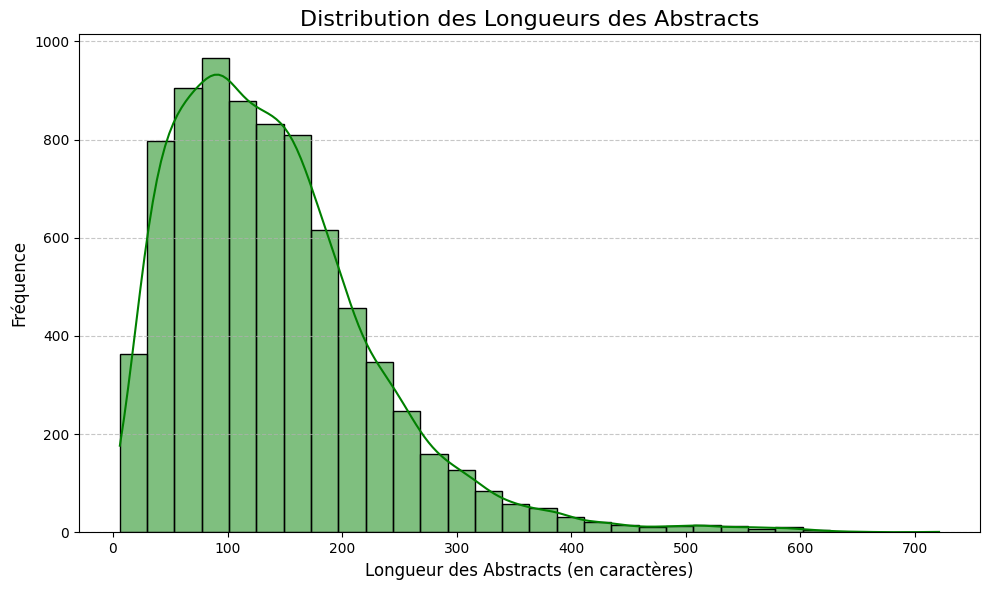

In [13]:
# Tracer l'histogramme
plt.figure(figsize=(10, 6))
sns.histplot(
    df['content_length'], 
    bins=30,  # Nombre de bins
    kde=True,  # Ajouter une courbe KDE pour visualiser la densité
    color='green'  # Couleur de l'histogramme
)
plt.title('Distribution des Longueurs des Abstracts', fontsize=16)
plt.xlabel('Longueur des Abstracts (en caractères)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajouter une grille pour plus de lisibilité
plt.tight_layout()  # Ajuster les marges pour éviter que le graphique soit coupé
plt.show()

## Mots-clés par classe

In [14]:
from spacy.lang.en.stop_words import STOP_WORDS as stops
stops = list(stops) + ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

In [15]:
stops = stops + ['cases','case','patients','patient','treatment','result','disease','drug']

In [16]:
import spacy

# Charger le modèle spaCy (en anglais)
nlp = spacy.load("en_core_web_sm")

def lemmatize_token_spacy(token):
    """
    Lemmatize the token using spaCy
    Input: a single token (string)
    Output: the lemmatized form of the token
    """
    doc = nlp(token)
    # Retourner la forme lemmatisée du premier (et unique) token analysé
    return doc[0].lemma_

# Exemple d'utilisation
print(lemmatize_token_spacy("running"))  # Output: run
print(lemmatize_token_spacy("better"))   # Output: well

run
well


In [17]:
def clean_content(text, stops):
  text = text.lower()
  text = re.sub("\\W"," ",text) # remove special chars
  Tokens = word_tokenize(text)
  # remove stop words and non-alphabetic from all the text
  list_Tokens = [word for word in Tokens if (word not in stops) and word.isalpha()]
  lemma_list = [lemmatize_token_spacy(token) for token in list_Tokens]
  #lemmatisation
  return " ".join(list_Tokens)

In [18]:
df['clean_content'] = df['content'].swifter.apply(lambda x: clean_content(x, stops))

Pandas Apply:   0%|          | 0/7823 [00:00<?, ?it/s]

In [19]:
df.to_csv('MuchMoreData_clean.csv')

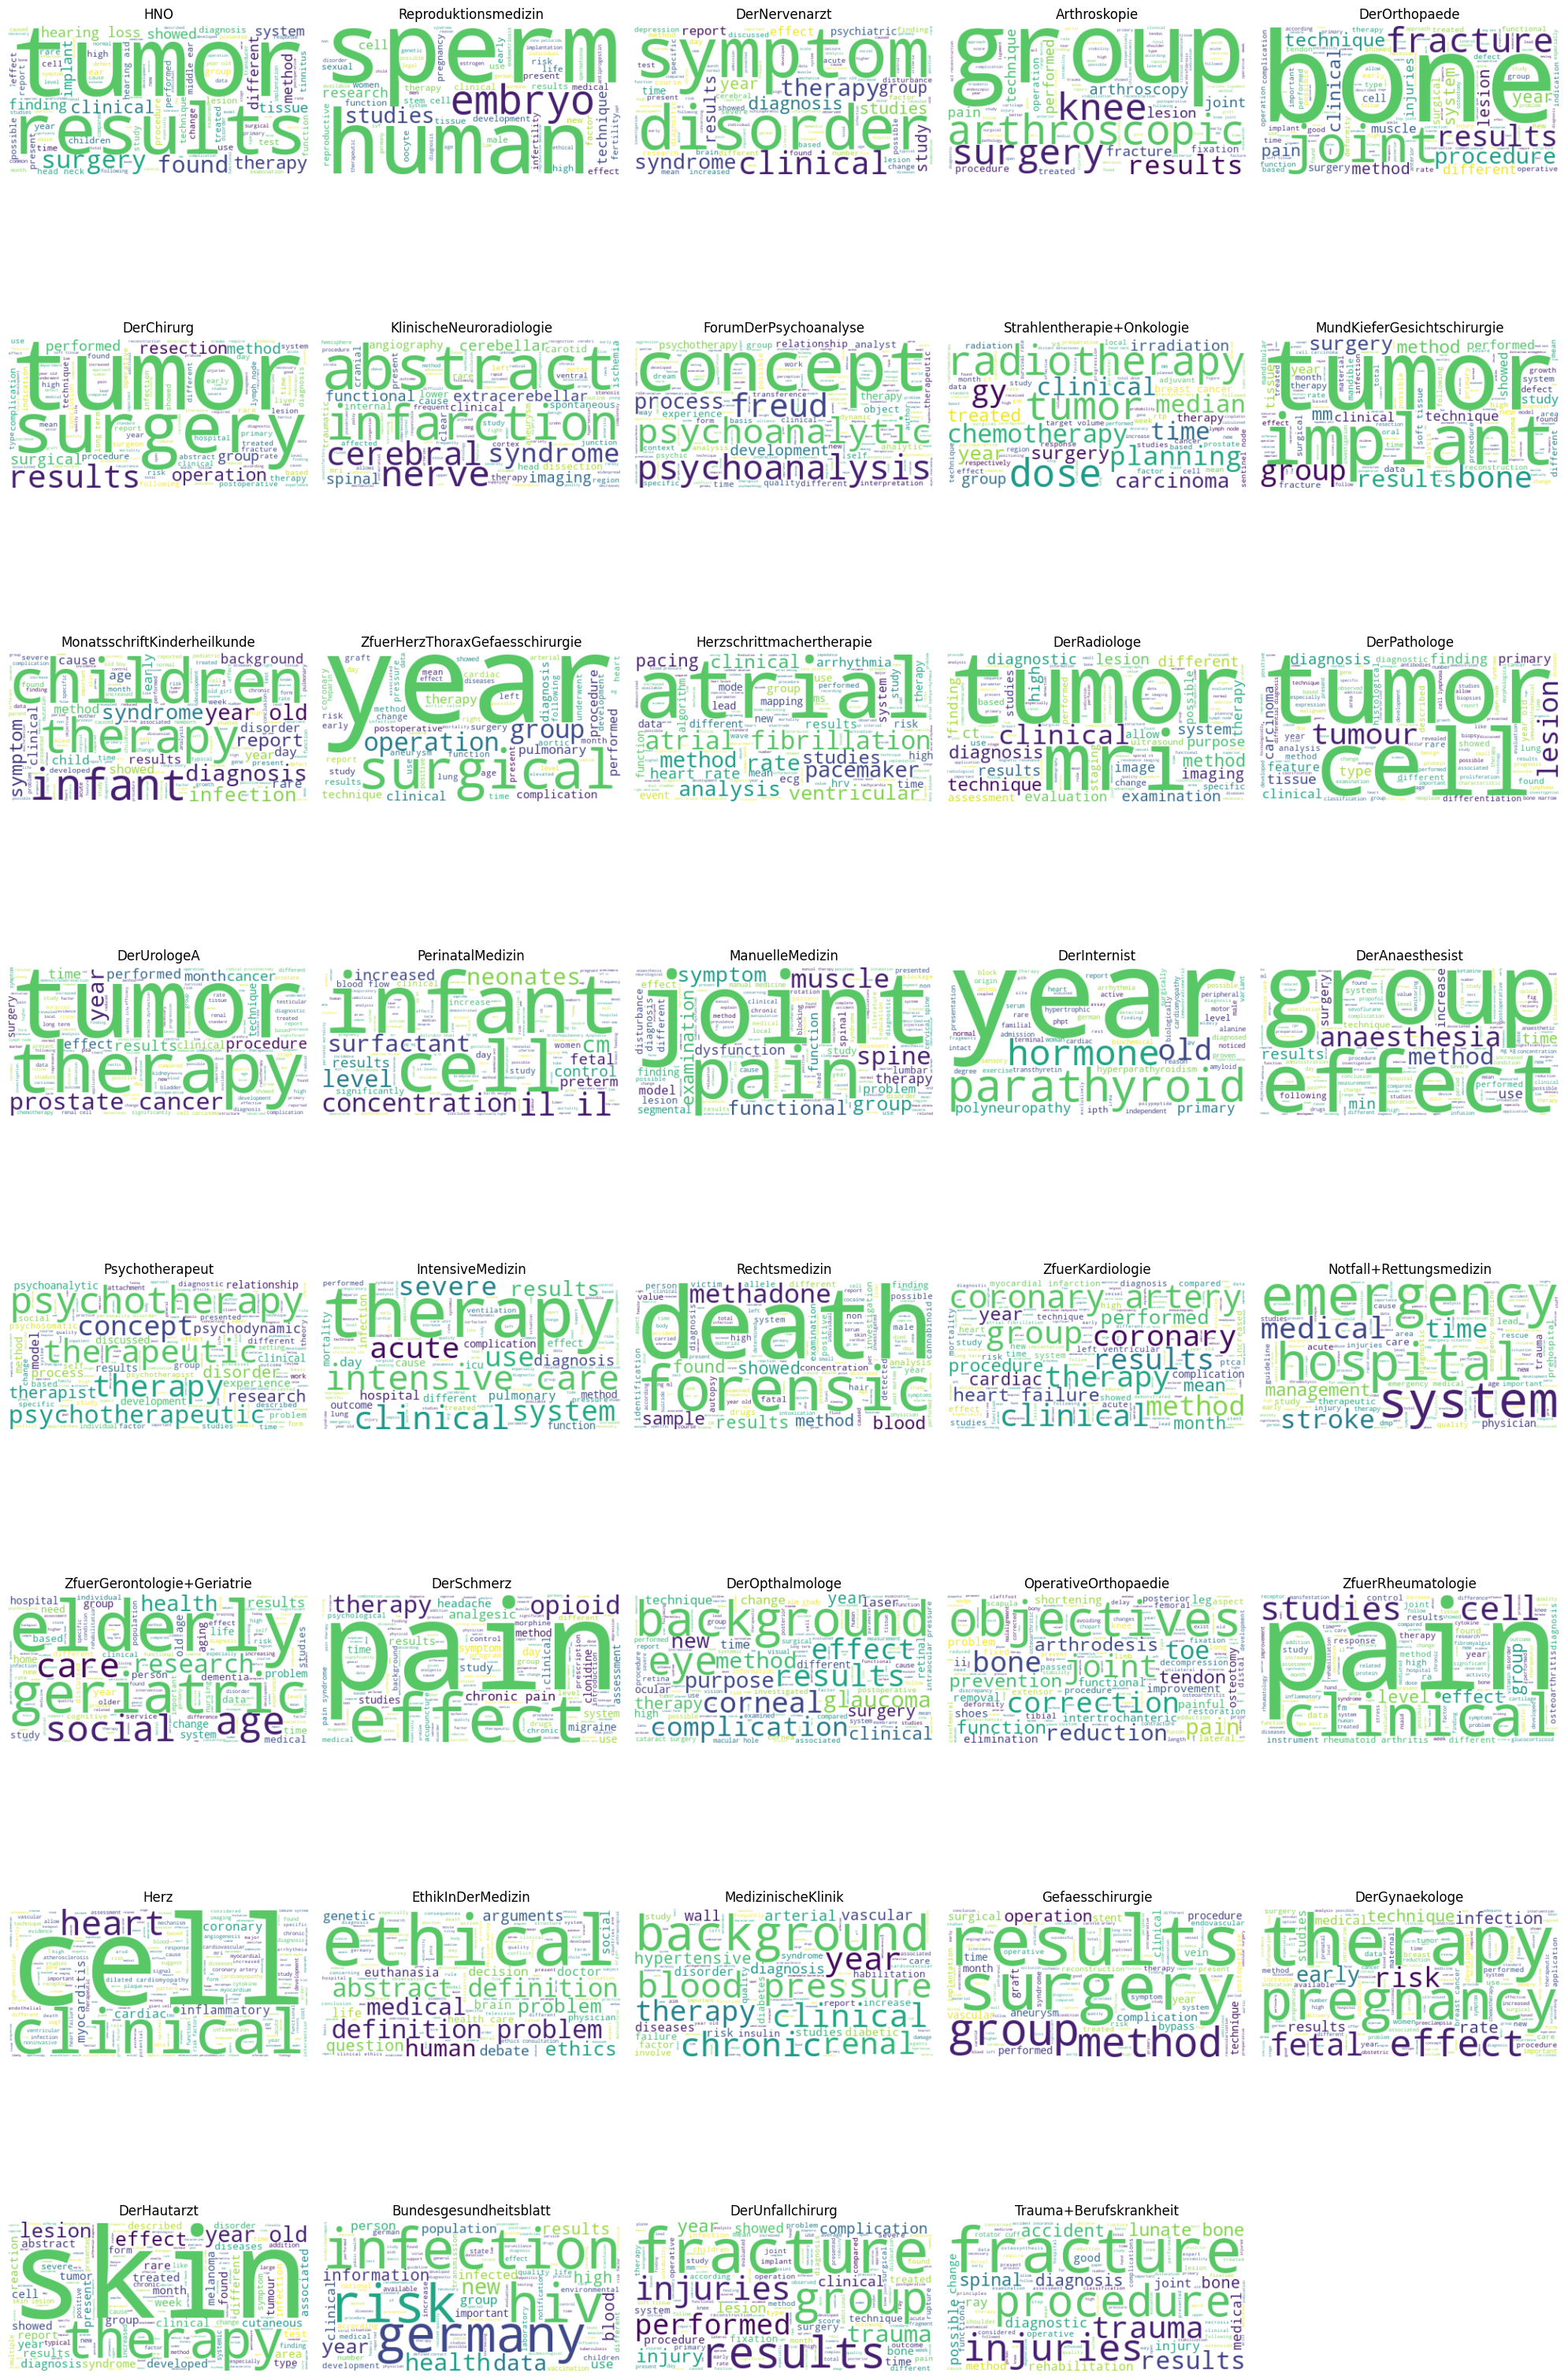

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
from PIL import Image

# Assurez-vous d'importer les données de df et les stopwords de stops avant d'exécuter ce code.

def display_cloud(data, ax, category, color='blue'):
    wc = WordCloud(stopwords=stops,
                   background_color="white", contour_width=2, contour_color=color,
                   max_words=2000, max_font_size=256,
                   random_state=42)
    wc.generate(' '.join(data))
    ax.set_title(category)
    ax.imshow(wc, interpolation="bilinear")
    ax.axis('off')

# Nombre de colonnes et de lignes
cols = 5
rows = 9

# Initialiser la figure
fig, axes = plt.subplots(rows, cols, figsize=(20, 36))


cat = set(df['clean_category'].tolist())

# Parcourir les catégories et les axes de la grille
for ax, val in zip(axes.flatten(), cat):
    data = df[df['clean_category'] == val]['clean_content']
    display_cloud(data, ax, val)

# Supprimer les sous-parcelles vides
for i in range(len(cat), rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Relations entre catégories

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Étape 1 : Calcul des vecteurs TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['clean_content'])  # Crée la matrice TF-IDF

# Étape 2 : Moyenne des vecteurs par catégorie
categories = df['clean_category'].unique()  # Liste des catégories
category_vectors = {}

for category in categories:
    # Sélectionner les abstracts de chaque catégorie
    category_texts = df[df['clean_category'] == category]['clean_content']
    # Calculer la moyenne des vecteurs TF-IDF pour cette catégorie
    category_vector = tfidf.transform(category_texts).mean(axis=0)
    category_vectors[category] = category_vector

# Convertir en matrice pour le calcul des similarités
category_matrix = np.vstack([category_vectors[cat] for cat in categories])


In [22]:
# Étape 3 : Calculer la similarité cosinus
similarity_matrix = cosine_similarity(np.asarray(category_matrix))

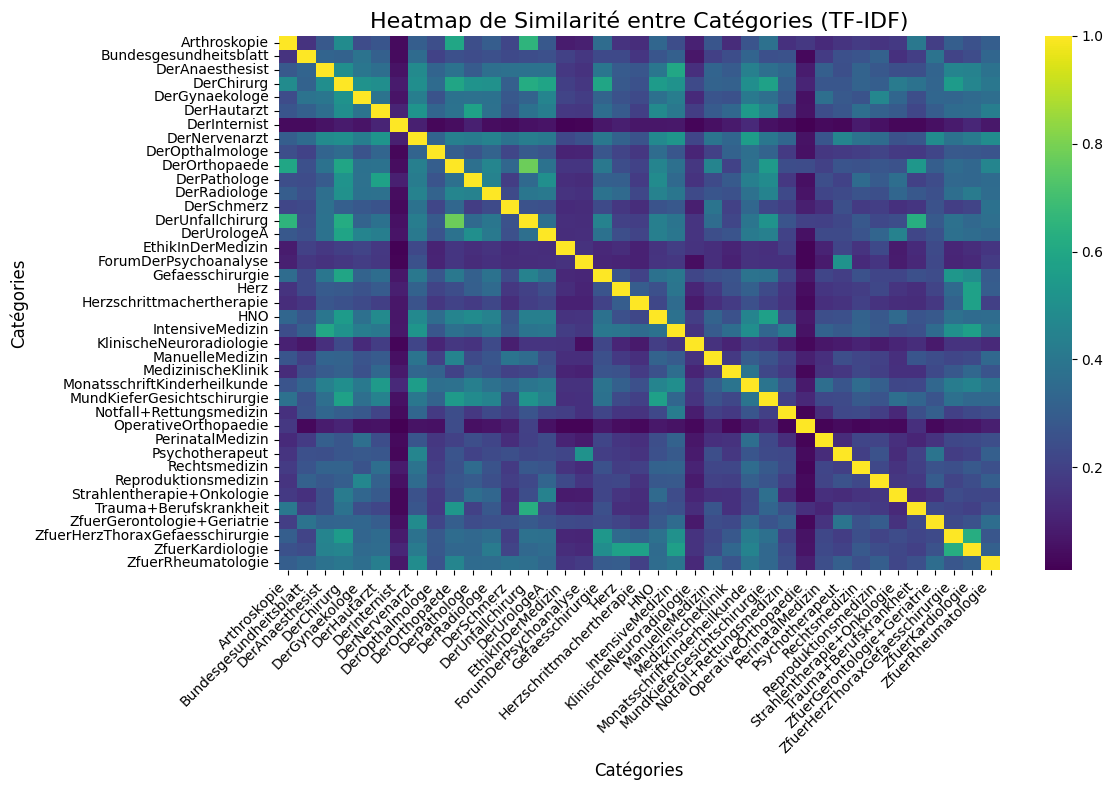

In [23]:
# Étape 4 : Tracer la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    similarity_matrix, 
    #annot=True,  # Affiche les valeurs
    xticklabels=categories, 
    yticklabels=categories, 
    cmap='viridis', 
    fmt=".2f"
)
plt.title('Heatmap de Similarité entre Catégories (TF-IDF)', fontsize=16)
plt.xlabel('Catégories', fontsize=12)
plt.ylabel('Catégories', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Comparaisons des performances de SVM linéaire et Naive Bayes

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_fscore_support
)
import time


In [25]:
# Transformation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limitez à 5000 caractéristiques
X = tfidf.fit_transform(df['clean_content'])
y = df['clean_category']

# Division des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## a)  SVM Linéaire

In [26]:
# Entraînement SVM
C_values = [0.1, 1, 10]  # Différents coefficients de régularisation
svm_results = []
for C in C_values:
    model_svm = LinearSVC(C=C, random_state=42)
    start = time.time()
    model_svm.fit(X_train, y_train)
    train_time = time.time() - start

    # Prédictions
    start = time.time()
    y_pred_svm = model_svm.predict(X_test)
    pred_time = time.time() - start

    # Évaluation
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_svm, average='weighted')
    svm_results.append((C, precision, recall, f1, train_time, pred_time))

# Conversion des résultats en DataFrame
svm_df = pd.DataFrame(svm_results, columns=["C", "Precision", "Recall", "F1-Score", "Train Time", "Prediction Time"])


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## b) Naive Bayes

In [27]:
# Entraînement Naive Bayes
alpha_values = [0.1, 1, 10]  # Différentes valeurs de lissage
nb_results = []
for alpha in alpha_values:
    model_nb = MultinomialNB(alpha=alpha)
    start = time.time()
    model_nb.fit(X_train, y_train)
    train_time = time.time() - start

    # Prédictions
    start = time.time()
    y_pred_nb = model_nb.predict(X_test)
    pred_time = time.time() - start

    # Évaluation
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_nb, average='weighted')
    nb_results.append((alpha, precision, recall, f1, train_time, pred_time))

# Conversion des résultats en DataFrame
nb_df = pd.DataFrame(nb_results, columns=["Alpha", "Precision", "Recall", "F1-Score", "Train Time", "Prediction Time"])


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## C) Matrices de confusion

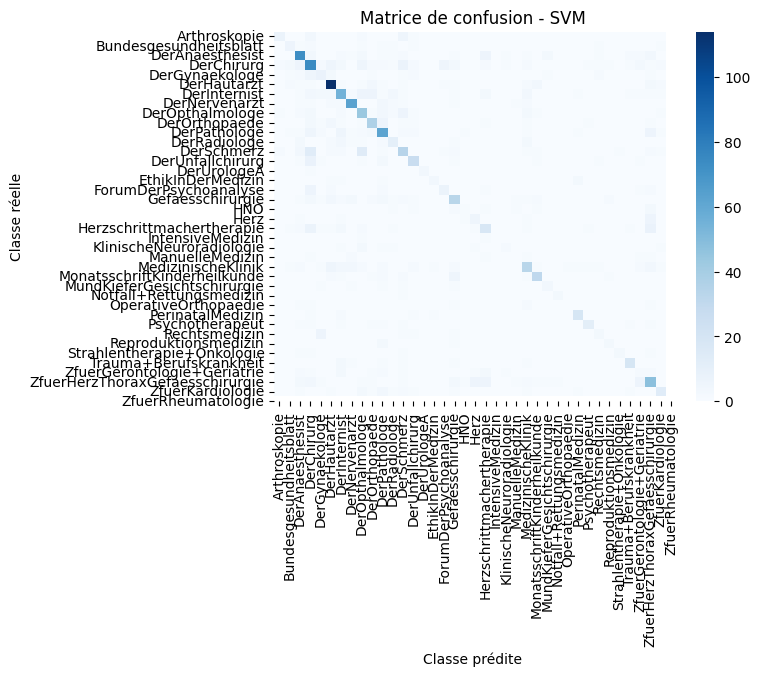

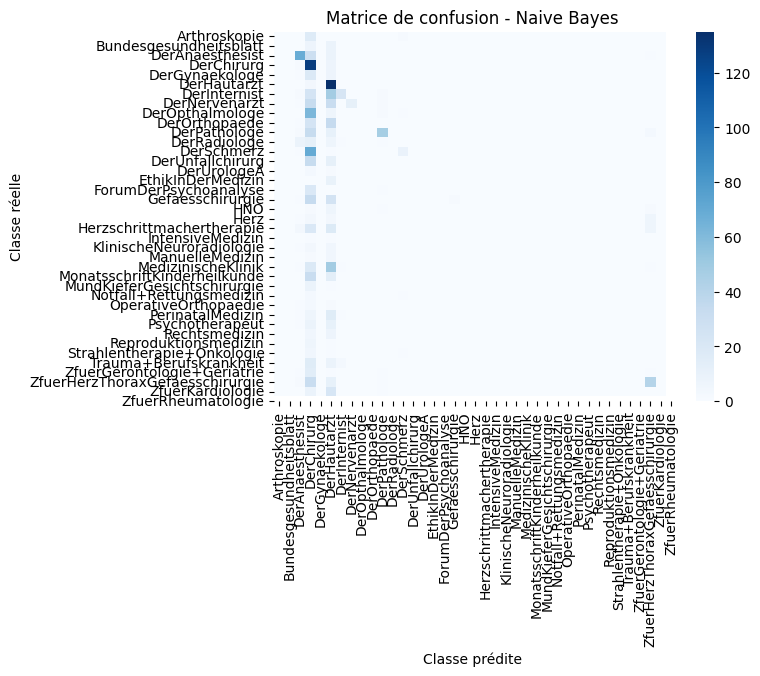

In [28]:
# Matrice de confusion SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, 
            #annot=True, 
            fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matrice de confusion - SVM")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

# Matrice de confusion Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, 
            #annot=True, 
            fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Matrice de confusion - Naive Bayes")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()


## d) Visualisation des performances

### Graphique radar

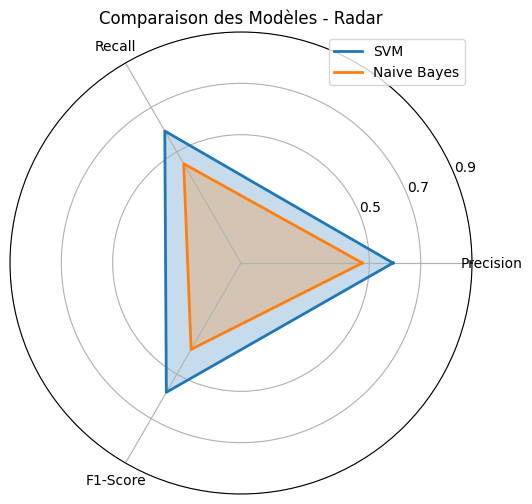

In [29]:
# Moyennes des scores pour chaque modèle
svm_avg = svm_df[["Precision", "Recall", "F1-Score"]].mean()
nb_avg = nb_df[["Precision", "Recall", "F1-Score"]].mean()

# Préparer les données pour le graphique radar
labels = ["Precision", "Recall", "F1-Score"]
values_svm = svm_avg.values
values_nb = nb_avg.values
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values_svm = np.concatenate((values_svm, [values_svm[0]]))
values_nb = np.concatenate((values_nb, [values_nb[0]]))
angles += angles[:1]

# Tracer le graphique radar
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values_svm, label="SVM", linewidth=2)
ax.fill(angles, values_svm, alpha=0.25)
ax.plot(angles, values_nb, label="Naive Bayes", linewidth=2)
ax.fill(angles, values_nb, alpha=0.25)
ax.set_yticks([0.5, 0.7, 0.9])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.legend(loc="upper right")
plt.title("Comparaison des Modèles - Radar")
plt.show()


### Histogramme des performances


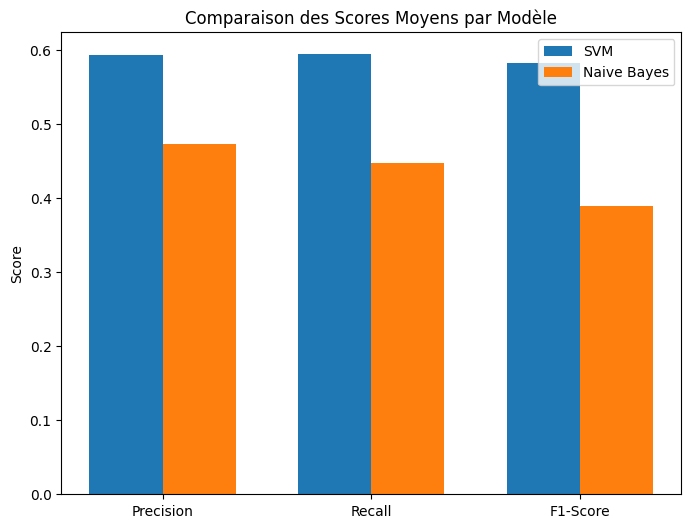

In [30]:
# Comparaison des performances par métrique
metrics = ["Precision", "Recall", "F1-Score"]
svm_scores = svm_df[metrics].mean()
nb_scores = nb_df[metrics].mean()

x = np.arange(len(metrics))  # Labels des métriques
width = 0.35  # Largeur des barres

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, svm_scores, width, label="SVM")
ax.bar(x + width/2, nb_scores, width, label="Naive Bayes")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylabel("Score")
ax.set_title("Comparaison des Scores Moyens par Modèle")
ax.legend()
plt.show()


## e) Courbes ROC/AUC

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


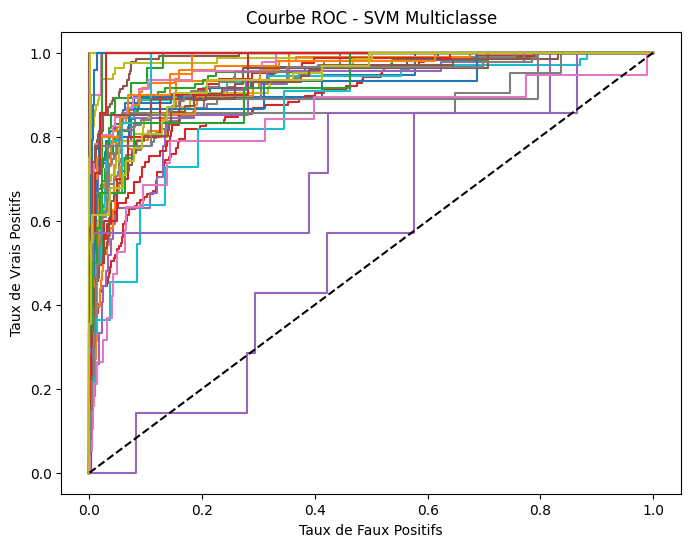

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Binariser les étiquettes pour ROC multiclasses
y_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Modèle SVM One-vs-Rest
ovr_svm = OneVsRestClassifier(LinearSVC(C=1, random_state=42))
y_score_svm = ovr_svm.fit(X_train, y_train).decision_function(X_test)

# Vérifiez la taille des étiquettes et des scores
assert y_binarized.shape[0] == y_score_svm.shape[0], "Inconsistent sizes between y_binarized and y_score_svm"

# Calcul ROC par classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score_svm[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracer une courbe ROC pour chaque classe
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Classe {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Baseline (AUC = 0.50)")  # Diagonale
plt.title("Courbe ROC - SVM Multiclasse")
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
#plt.legend()
plt.show()



# Exploration interactive des données et résultats

In [32]:
#voir streamlit

# Conclusions